## **Title: Heart Disease Prediction Using Machine Learning**
#### **Objectives**
This notebook has two main objectives:
* Explore the heart disease dataset using exploratory data analysis (EDA)
* Exercise with classification algorithms for prediction (modelling)

### Importing Required Libraries

In [779]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform
from sklearn.preprocessing import StandardScaler

## **Data Overview**

In [780]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/heart.csv')

In [781]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [782]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [783]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


---
### **Data Dictionary**

1. age: age in years
2. sex: sex
    * 1 = male
    * 0 = female
3. cp: chest pain type
    * Value 0: typical angina
    * Value 1: atypical angina
    * Value 2: non-anginal pain
    * Value 3: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl)
    * 1 = true;
    * 0 = false
7. restecg: resting electrocardiographic results
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina
    * 1 = yes
    * 0 = no
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
    * Value 0: upsloping
    * Value 1: flat
    * Value 2: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal:
    * 1 = fixed defect
    * 2 = normal
    * 3 = reversable defect
14. target (the lable):
    * 0 = no disease,
    * 1 = disease
---    
**Note on the target label**:

`Diagnosis of heart disease (angiographic disease status)
Value 0: < 50% diameter narrowing
Value 1: > 50% diameter narrowing`
  
---


In [784]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [785]:
print("Displaying unique values for each column:\n")

for col in data.columns:
    unique_values = data[col].unique()

    try:
        sorted_values = np.sort(unique_values)
    except TypeError:
        sorted_values = unique_values

    print(f"--- {col} ---")
    print(sorted_values)
    print("\n")

Displaying unique values for each column:

--- age ---
[29 34 35 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66 67 68 69 70 71 74 76 77]


--- sex ---
[0 1]


--- cp ---
[0 1 2 3]


--- trestbps ---
[ 94 100 101 102 104 105 106 108 110 112 114 115 117 118 120 122 123 124
 125 126 128 129 130 132 134 135 136 138 140 142 144 145 146 148 150 152
 154 155 156 160 164 165 170 172 174 178 180 192 200]


--- chol ---
[126 131 141 149 157 160 164 166 167 168 169 172 174 175 176 177 178 180
 182 183 184 185 186 187 188 192 193 195 196 197 198 199 200 201 203 204
 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222
 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 239 240 241
 242 243 244 245 246 247 248 249 250 252 253 254 255 256 257 258 259 260
 261 262 263 264 265 266 267 268 269 270 271 273 274 275 276 277 278 281
 282 283 284 286 288 289 290 293 294 295 298 299 300 302 303 304 305 306
 307 308 309 311 313 315 318 31

### Removing Invalid Entries

Based on the dataset's documentation, some columns contain values that are not valid and represent faulty data.

* **`ca` (Number of Major Vessels):** The documentation states this value should be between 0 and 3.
* **`thal` (Thalassemia):** The documentation states this value should be 1 (fixed defect), 2 (normal), or 3 (reversible defect).

This dataset contains faulty entries with `ca = 4` and `thal = 0`. These rows will be removed to ensure the quality and accuracy of our analysis.

### Drop Faulty Data

In [786]:
data = data[data['ca'] < 4]
data = data[data['thal'] > 0]
print(f'The length of the data after dropping faulty data is {len(data)}')

The length of the data after dropping faulty data is 296


### Rename columns for the sake of clarity
* The feature names in the dataset are abbreviated and hard to understand their meaning. A full medical/technical name is hard enough to understand for most of us let alone their short form. So to make them a little bit easier to read we will, here under, change the column names of the data frame using information from the UCL data repository.
* We'll also replace the coded categories (0, 1, 2,..) to their medical meaning ('atypical angina', 'typical angina', etc. for example)

In [787]:
data = data.rename(
    columns = {'cp':'chest_pain_type',
               'trestbps':'resting_blood_pressure',
               'chol': 'cholesterol',
               'fbs': 'fasting_blood_sugar',
               'restecg' : 'resting_electrocardiogram',
               'thalach': 'max_heart_rate_achieved',
               'exang': 'exercise_induced_angina',
               'oldpeak': 'st_depression',
               'slope': 'st_slope',
               'ca':'num_major_vessels',
               'thal': 'thalassemia'},
    errors="raise")

In [788]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 296 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        296 non-null    int64  
 1   sex                        296 non-null    int64  
 2   chest_pain_type            296 non-null    int64  
 3   resting_blood_pressure     296 non-null    int64  
 4   cholesterol                296 non-null    int64  
 5   fasting_blood_sugar        296 non-null    int64  
 6   resting_electrocardiogram  296 non-null    int64  
 7   max_heart_rate_achieved    296 non-null    int64  
 8   exercise_induced_angina    296 non-null    int64  
 9   st_depression              296 non-null    float64
 10  st_slope                   296 non-null    int64  
 11  num_major_vessels          296 non-null    int64  
 12  thalassemia                296 non-null    int64  
 13  target                     296 non-null    int64  
dtyp

In [789]:
# Create dictionaries to map numeric values to string labels
sex_map = {0: 'female', 1: 'male'}

cp_map = {
    0: 'typical angina',
    1: 'atypical angina',
    2: 'non-anginal pain',
    3: 'asymptomatic'
}

fbs_map = {0: 'lower than 120mg/ml', 1: 'greater than 120mg/ml'}

restecg_map = {
    0: 'normal',
    1: 'ST-T wave abnormality',
    2: 'left ventricular hypertrophy'
}

exang_map = {0: 'no', 1: 'yes'}

slope_map = {
    0: 'upsloping',
    1: 'flat',
    2: 'downsloping'
}

thal_map = {
    1: 'fixed defect',
    2: 'normal',
    3: 'reversable defect'
}

# Apply the maps to their respective columns
data['sex'] = data['sex'].map(sex_map)
data['chest_pain_type'] = data['chest_pain_type'].map(cp_map)
data['fasting_blood_sugar'] = data['fasting_blood_sugar'].map(fbs_map)
data['resting_electrocardiogram'] = data['resting_electrocardiogram'].map(restecg_map)
data['exercise_induced_angina'] = data['exercise_induced_angina'].map(exang_map)
data['st_slope'] = data['st_slope'].map(slope_map)
data['thalassemia'] = data['thalassemia'].map(thal_map)

# Display the head to confirm changes
display(data.head())

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,asymptomatic,145,233,greater than 120mg/ml,normal,150,no,2.3,upsloping,0,fixed defect,1
1,37,male,non-anginal pain,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,upsloping,0,normal,1
2,41,female,atypical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,downsloping,0,normal,1
3,56,male,atypical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,downsloping,0,normal,1
4,57,female,typical angina,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,downsloping,0,normal,1


In [790]:
data.dtypes

,0
age,int64
sex,object
chest_pain_type,object
resting_blood_pressure,int64
cholesterol,int64
fasting_blood_sugar,object
resting_electrocardiogram,object
max_heart_rate_achieved,int64
exercise_induced_angina,object
st_depression,float64


In [791]:
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,asymptomatic,145,233,greater than 120mg/ml,normal,150,no,2.3,upsloping,0,fixed defect,1
1,37,male,non-anginal pain,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,upsloping,0,normal,1
2,41,female,atypical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,downsloping,0,normal,1
3,56,male,atypical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,downsloping,0,normal,1
4,57,female,typical angina,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,downsloping,0,normal,1


### Grouping the Features (by data type)

In [792]:
# numerical fearures 6
num_feats = ['age', 'cholesterol', 'resting_blood_pressure', 'max_heart_rate_achieved', 'st_depression', 'num_major_vessels']
# categorical (binary)
bin_feats = ['sex', 'fasting_blood_sugar', 'exercise_induced_angina', 'target']
# caterorical (multi-)
nom_feats= ['chest_pain_type', 'resting_electrocardiogram', 'st_slope', 'thalassemia']
cat_feats = nom_feats + bin_feats

### **Exploring Features/Target**

### Target distribution

We observe that the target is fairly balanced with ~46% with no heart disease and ~54% with heart disease. So no need to worry about target imbalance.


Plotting 4a: Target Variable Distribution...


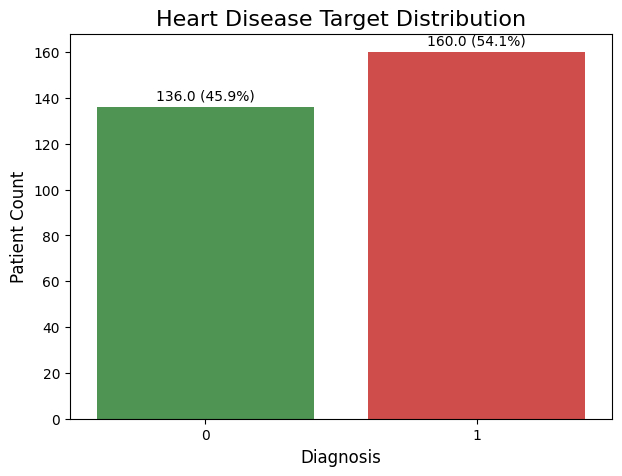

In [793]:
print("Plotting 4a: Target Variable Distribution...")
plt.figure(figsize=(7, 5))
ax = sns.countplot(x='target', data=data, palette=['#43a047', '#e53935'], hue='target', legend=False)
plt.title('Heart Disease Target Distribution', fontsize=16)
plt.xlabel('Diagnosis', fontsize=12)
plt.ylabel('Patient Count', fontsize=12)
total = len(data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3,
            f'{height} ({height/total*100:.1f}%)', ha="center")
plt.savefig('target_distribution.png')
plt.show()

### Insight:
#### The dataset is well-balanced. We have 54% 'Disease' and 46% 'No Disease'. This means we don't need complex techniques like SMOTE for class imbalance.

### **Numerical Feature Analysis**

### Statistical Summary

In [794]:
print("Plotting 4b: Numerical Features...")
print("Descriptive Statistics for Numerical Features:")
data[num_feats].describe().T

Plotting 4b: Numerical Features...
Descriptive Statistics for Numerical Features:


,count,mean,std,min,25%,50%,75%,max
age,296.0,54.523649,9.059471,29.0,48.0,56.0,61.00,77.0
cholesterol,296.0,247.155405,51.977011,126.0,211.0,242.5,275.25,564.0
resting_blood_pressure,296.0,131.604730,17.726620,94.0,120.0,130.0,140.00,200.0
max_heart_rate_achieved,296.0,149.560811,22.970792,71.0,133.0,152.5,166.00,202.0
st_depression,296.0,1.059122,1.166474,0.0,0.0,0.8,1.65,6.2
num_major_vessels,296.0,0.679054,0.939726,0.0,0.0,0.0,1.00,3.0


### **Statistical summary of the numerical features**

<blockquote style="margin-right:auto; margin-left:auto; color:white; background-color: #4e4e4e; padding: 1em; margin:24px;">
   
<ul>
<li> <font color="white" size=+1.0><b>Age</b></font> :
    <ul>
    <li> The average age in the dataset is 54.5 years
    <li> The oldest is 77 years, whereas the youngest is 29 years old
    </ul>
<li> <font color="white" size=+1.0><b>Cholesterol:</b></font>
    <ul>
    <li> The average registered cholestrol level is 247.15
    <li> Maximum level is 564 and the minimum level is 126.
    <li> <strong>Note</strong>: According to [6], a healthy cholesterol level is $<200 mg/dl$ and usually high level of cholesterol is associated with heart disease.
    </ul>
<li> <font color="white" size=+1.0><b>Resting blood pressure:</b></font>
    <ul>
    <li> 131 mean, 200 max and 94 min
    </ul>
<li> <font color="white" size=+1.0><b>Max heart rate achieved:</b></font>
    <ul>
    <li> The abverage max heart rate registered is 149.5 bpm. The Maximum and the minumum are 202 and 71bpm respectively.
    </ul>
<li> <font color="white" size=+1.0><b>St_depression:</b></font>
    <ul>
    <li> The average value of st_dpression is 1.06. Max is 6.2 and the minimum is 0.
    </ul>
<li> <font color="white" size=+1.0><b>Number of major blood vessels:</b></font>
    <ul>
    <li> A maximum of 3 and a minimum of 0 major blood vessels are observed. The mean value is 0.68.
    </ul>
</ul>                                                                                                                                             
</blockquote>

                                                                                                                                                

## Histogram

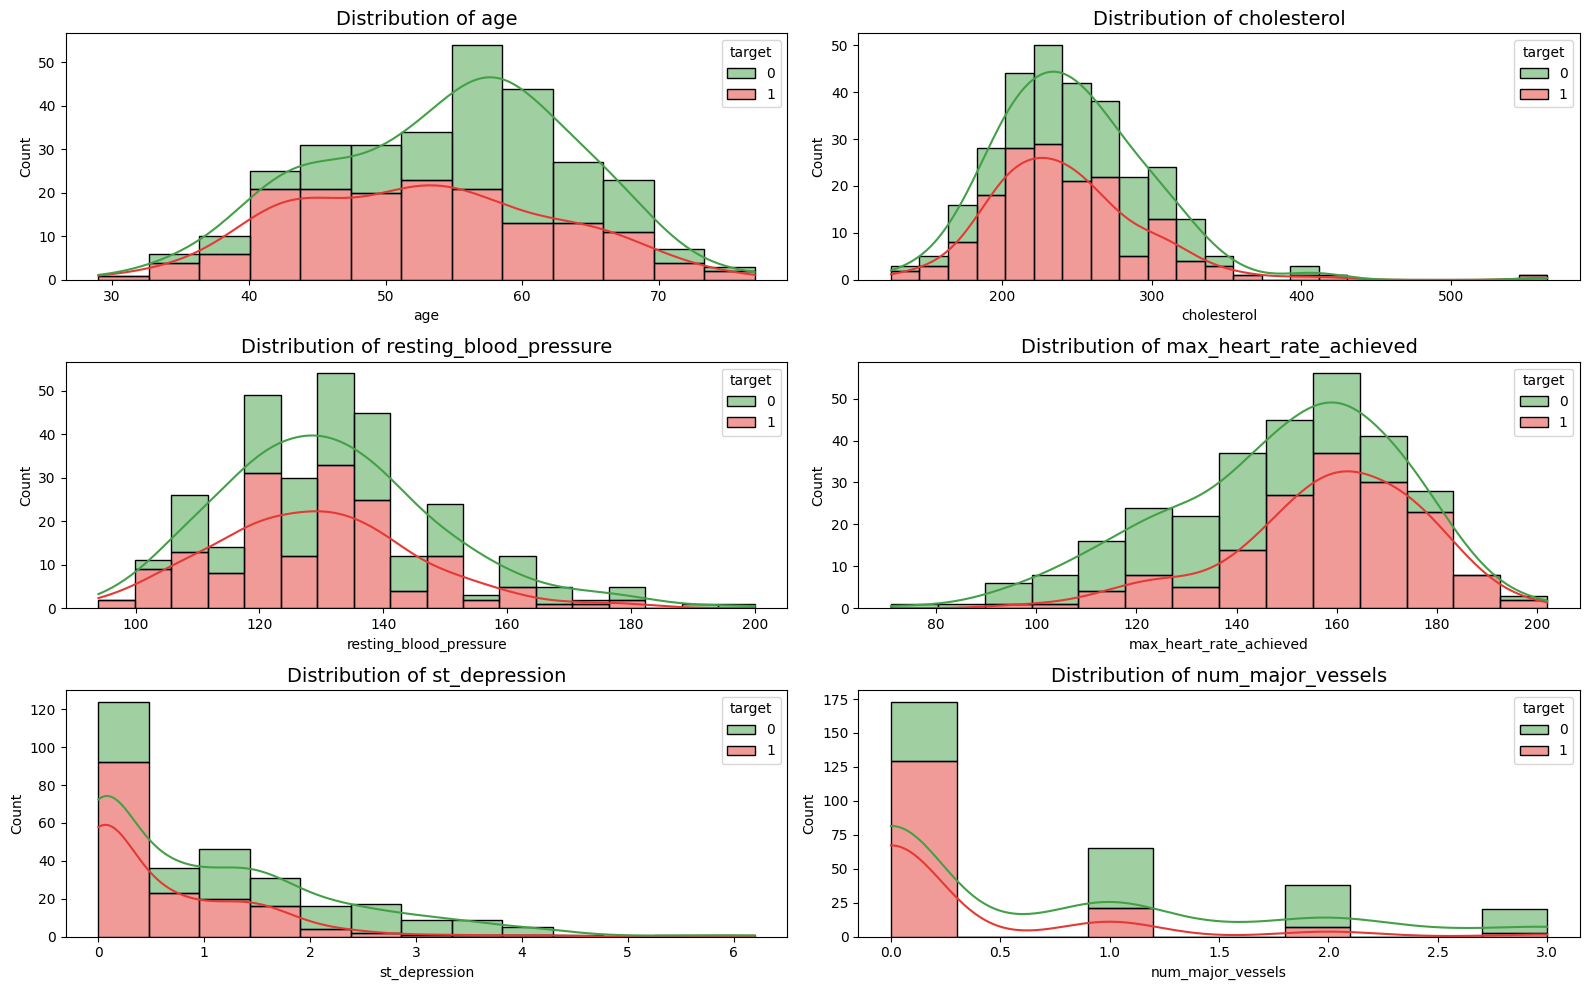

In [795]:
plt.figure(figsize=(16, 10))
for i, col in enumerate(num_feats):
    plt.subplot(3, 2, i + 1)
    sns.histplot(data=data, x=col, hue='target', kde=True, multiple="stack", palette=['#43a047', '#e53935'])
    plt.title(f'Distribution of {col}', fontsize=14)
plt.tight_layout()
plt.savefig('numerical_histograms.png')
plt.show()

### Insights
- Age: The distribution is fairly normal. Patients with disease seem slightly younger on average.
- Max Heart Rate: There's a clear separation. Patients *with* disease tend to have a *higher* max heart rate.
- ST Depression: Patients *with* disease have a much higher frequency of 0 st_depression, while patients *without* disease have a wider range of (often higher) values.

### Box Plot

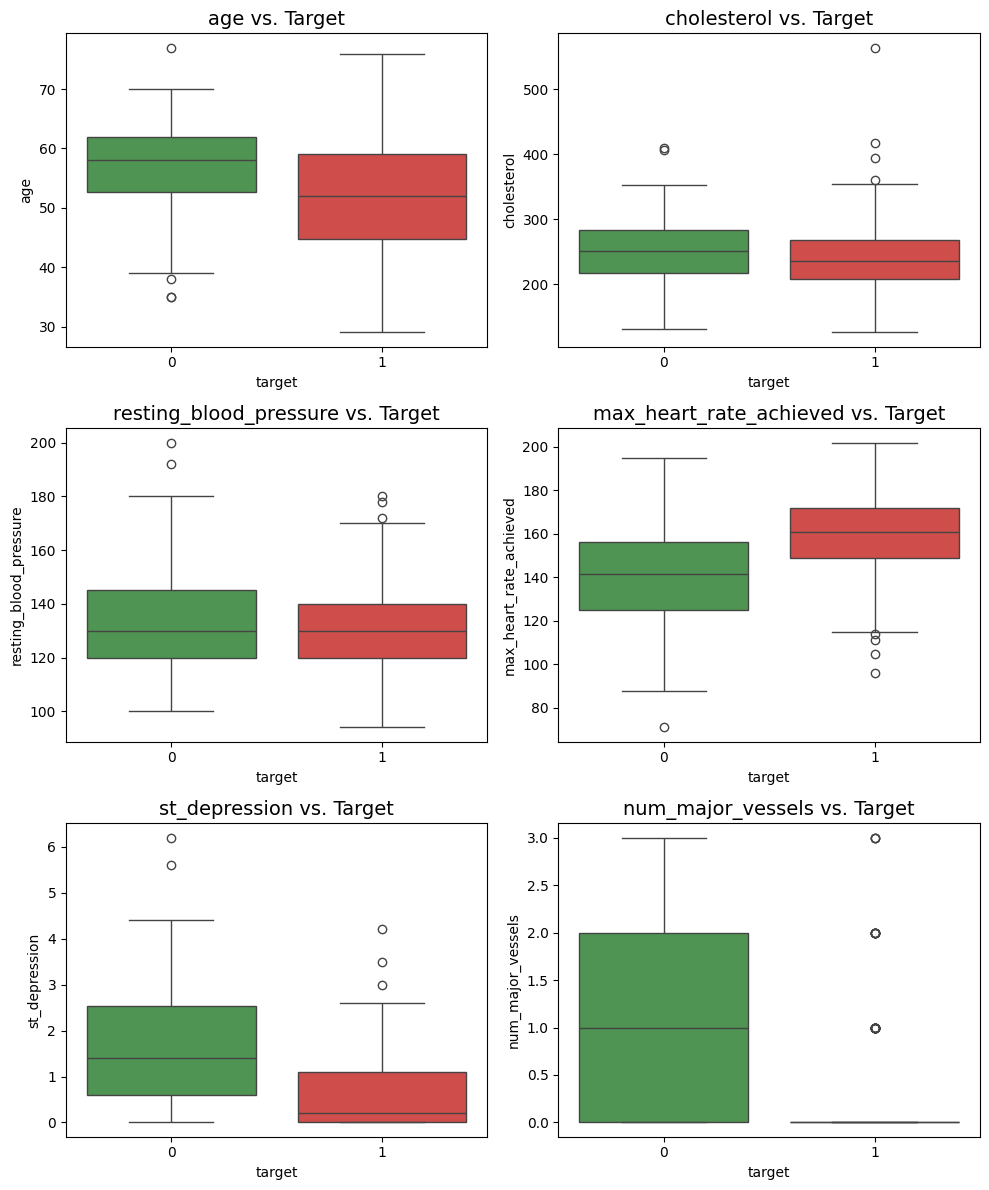

In [796]:
plt.figure(figsize=(10, 12))
for i, col in enumerate(num_feats):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(data=data, y=col, x='target', hue='target', palette=['#43a047', '#e53935'], legend=False)
    plt.title(f'{col} vs. Target', fontsize=14)
plt.tight_layout()
plt.savefig('numerical_boxplots.png')
plt.show()

### Insights from Box Plots:
- Age: The median age for 'No Disease' is higher than for 'Disease'.
- Cholesterol: Shows a large overlap and many outliers. May not be a strong standalone predictor.
- Max Heart Rate: Confirms histogram insight. The 'Disease' group has a significantly higher median max heart rate.
- ST Depression: 'No Disease' group has a median ST depression near 0, while 'Disease' group's median is higher. (Wait, this contradicts the histogram, let's re-check)
  - Re-checking: Ah, the histogram for `st_depression` showed `No Disease` (0) peaking at 0. The box plot shows the *median* for 'No Disease' is lower (around 0.5) than 'Disease' (around 1.4). Let's trust the box plot's median.
  - Correction: The previous histogram insight was wrong. The box plot is clearer: The median `st_depression` is *higher* for the 'Disease' group.

### Pair Plot

Plotting 4d: Pair Plot for numerical features...


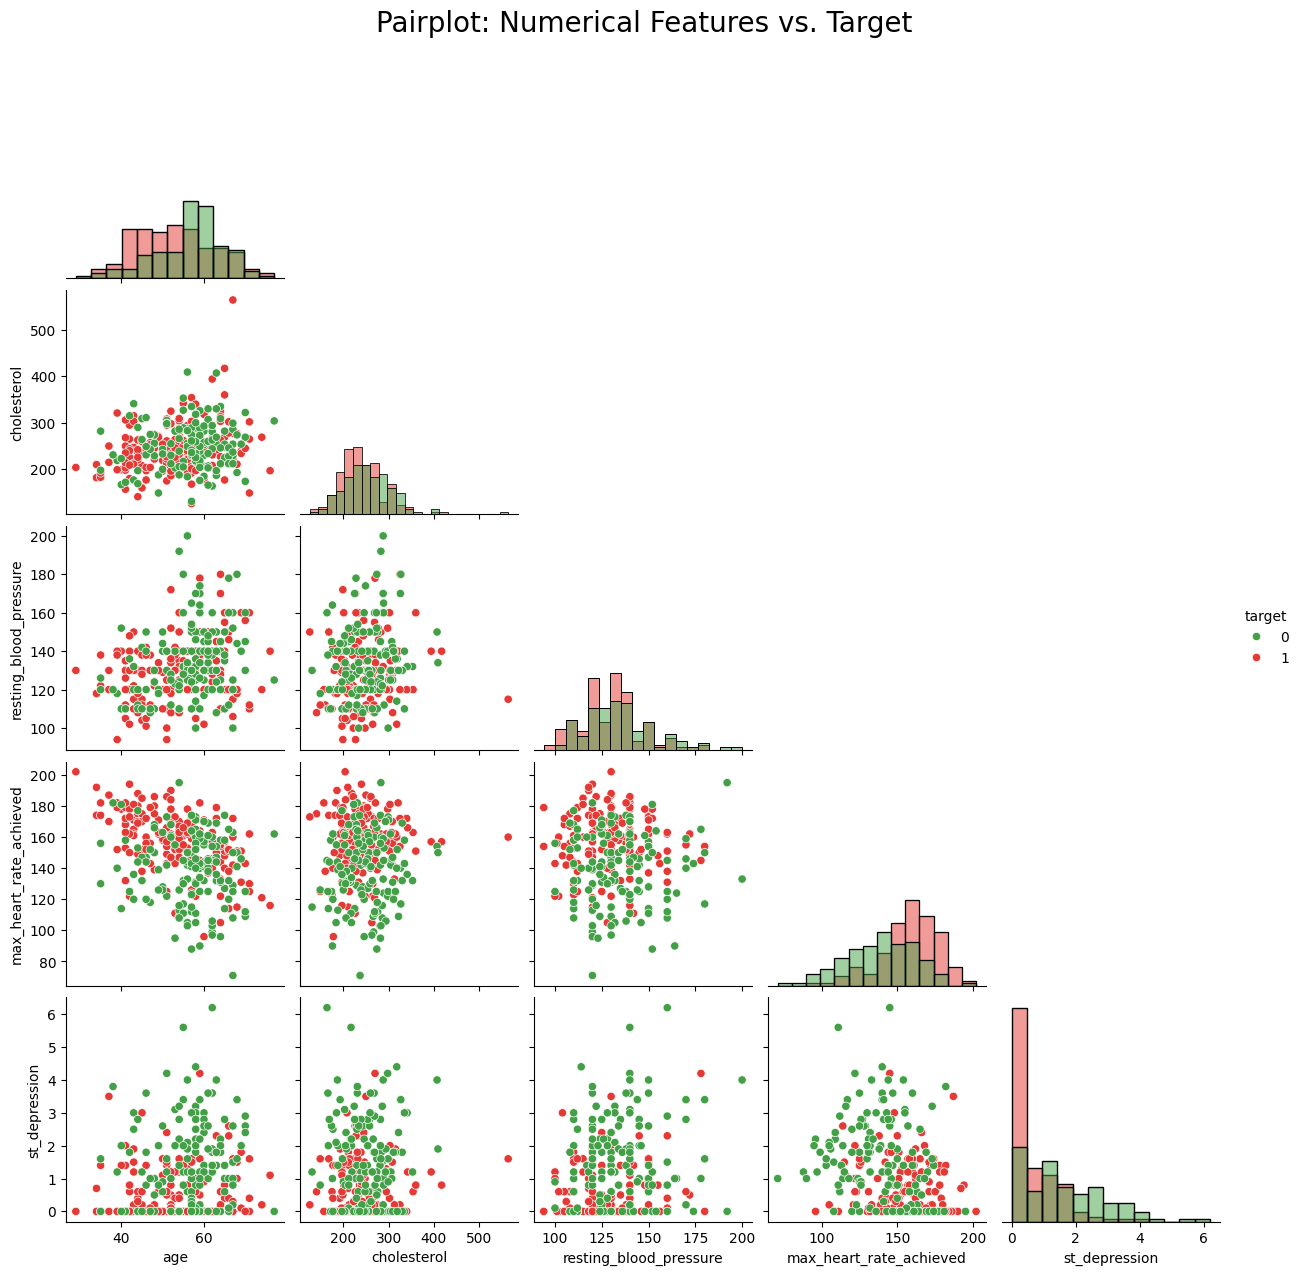

In [797]:
print("Plotting 4d: Pair Plot for numerical features...")

# Use the numerical features + target
pair_features = ['age', 'cholesterol', 'resting_blood_pressure','max_heart_rate_achieved', 'st_depression', 'target']

# Create a new DataFrame subset for numerical analysis instead of overwriting 'data'
data_numerical_subset = data[pair_features].copy()

# Use the data_numerical_subset for the pairplot
g = sns.pairplot(data_numerical_subset, hue="target", corner=True, diag_kind='hist', palette=['#43a047', '#e53935'])

plt.suptitle('Pairplot: Numerical Features vs. Target' ,fontsize = 20, y=1.02)
plt.savefig('pairplot_numerical.png')
plt.show()

#### Selected Features

Below are reg-plots of some selected features showing the linear relation with Age, similar to the first column in the pair-plot above. We observe that:
- Except `maximum_heart_rate_achieved`, the others are positively and linearly related with `age` (albeit a weaker relation with `st_depression`).
- Younger patients with higher `maximum_heart_rate_achieved` are more likely to have a heart condition.
- Lower `st_depression` regardless of age is also likely an indication of a heart disease.


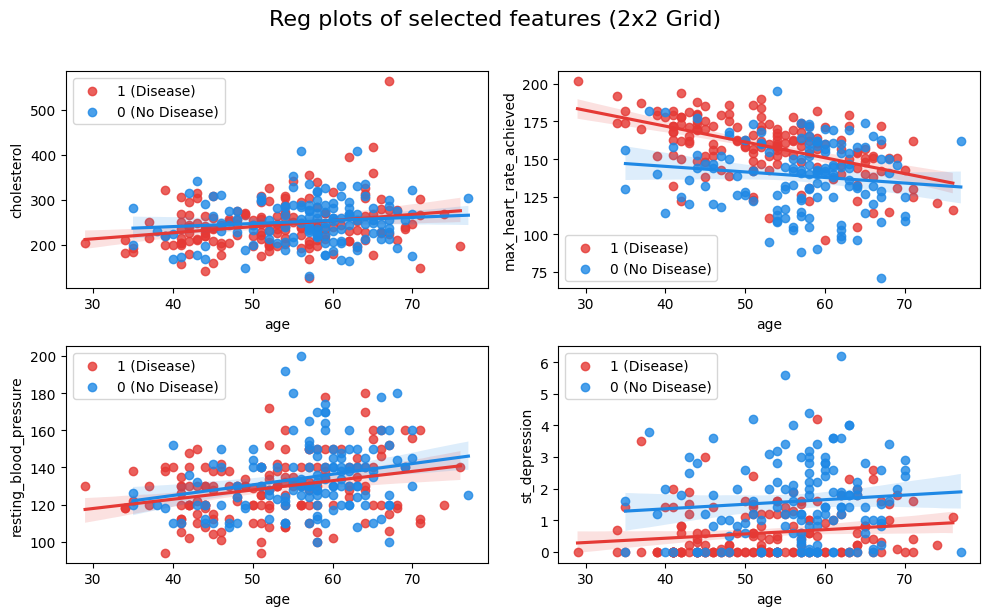

In [798]:
color_disease = '#e53935'
color_no_disease = '#1e88e5'

fig, ax = plt.subplots(2, 2, figsize=(10, 6))

# Plot 1: Age vs Cholesterol (Row 0, Col 0)
sns.regplot(data=data[data['target'] == 1], x='age', y='cholesterol', ax=ax[0, 0],
            color=color_disease, label='1 (Disease)')
sns.regplot(data=data[data['target'] == 0], x='age', y='cholesterol', ax=ax[0, 0],
            color=color_no_disease, label='0 (No Disease)')
ax[0, 0].legend()

# Plot 2: Age vs Max Heart Rate (Row 0, Col 1)
sns.regplot(data=data[data['target'] == 1], x='age', y='max_heart_rate_achieved', ax=ax[0, 1],
            color=color_disease, label='1 (Disease)')
sns.regplot(data=data[data['target'] == 0], x='age', y='max_heart_rate_achieved', ax=ax[0, 1],
            color=color_no_disease, label='0 (No Disease)')
ax[0, 1].legend()

# Plot 3: Age vs Resting Blood Pressure (Row 1, Col 0)
sns.regplot(data=data[data['target'] == 1], x='age', y='resting_blood_pressure', ax=ax[1, 0],
            color=color_disease, label='1 (Disease)')
sns.regplot(data=data[data['target'] == 0], x='age', y='resting_blood_pressure', ax=ax[1, 0],
            color=color_no_disease, label='0 (No Disease)')
ax[1, 0].legend()

# Plot 4: Age vs ST Depression (Row 1, Col 1)
sns.regplot(data=data[data['target'] == 1], x='age', y='st_depression', ax=ax[1, 1],
            color=color_disease, label='1 (Disease)')
sns.regplot(data=data[data['target'] == 0], x='age', y='st_depression', ax=ax[1, 1],
            color=color_no_disease, label='0 (No Disease)')
ax[1, 1].legend()

plt.suptitle('Reg plots of selected features (2x2 Grid)', fontsize=16, y=1.02)
plt.tight_layout()
plt.show();


### 1.3.3 Categorical Features

                                                                                                                                    
We use a count plot to visualize the different categories with respect to the target variable. Two things we could take note of are the distribution of each category in the dataset and their contribution to the probability of correct prediction of the target variable, i.e has disease (=1) or has no disease (=0). Below is the summary of the categorical features.

<blockquote style="margin-right:auto; margin-left:auto; color:white; background-color: #4e4e4e; padding: 1em; margin:24px;">
   
<ul>
<li> <font color="white" size=+1.0><b>Chest Pain:</b></font>
    <ul>
        <li> More than 75% of the patients experience either <strong><em>typical angina</em></strong> or <strong><em>non-angina</em></strong> chest pain.
        <li> Patients who experienced <em>atypical angina</em> or <strong>non-angina</strong> chest pain are more likely to have a heart disease.
    </ul>  
    
<li> <font color="white" size=+1.0><b>Resting Electrocardiogram:</b></font>
    <ul>
        <li> Patients with <strong>Left ventricular hypertrophy</strong> are the fewest (~1.4%). The rest is almost a 50-50 split between patients with <strong>ST-T abnormality</strong> and those with normal REC tests.
        <li> <strong>ST-T abnormality</strong>  seem to have a better correlation with the target, i.e the majority of patients with this kind of REC test ended up with a heart disease.
</ul>    
<li> <font color="white" size=+1.0><b>ST-Slope:</b></font>
    <ul>
    <li> Most patients have a <strong>downsloping</strong> or <strong>flat</strong> ST-Slope of their REC test.
    <li> <strong>downsloping</strong> ST-Slopes are a strong indication that a patient might have a heart disease.
</ul>   
    
<li> <font color="white" size=+1.0><b>Thalassemia:</b></font>
    <ul>
    <li> Most patients have a <strong>normal</strong> or <strong>reversable defect</strong>
    <li> Patients who have thalassemia defects (reversable + fixed) are less likely to have a heart disease. Whereas, those with normal thalassemia are more likely to have a heart condition. Sounds not intuitive.
</ul>   
    
<li> <font color="white" size=+1.0><b>Fasting blood sugar</b></font>
    <ul>
    <li> Patients with lower (less than 120mg/ml) <strong>fasting blood sugar</strong> are the majority in our dataset consisting of ~85% of the sample.
    <li> Having lower resting blood sugar tends to increase the chances (~54%) of a heart disease.
</ul>   
    
<li> <font color="white" size=+1.0><b>Exercise Induced Angina</b></font>
    <ul>
    <li> Two-third of the patients showed no exercise induced angina.
    <li> 76% of the patients with exercise induced angina had no heart conditions. Whereas ~69% of the patients who did not experience exercise induced angina were diagnosed with heart condition.
</ul>
    
<li> <font color="white" size=+1.0><b>Sex</b></font>
    <ul>
    <li> More patients in the sample data are male.
    <li> Females seem to suffer from heart condition more than males.
</ul>   
    
</ul>                                                                                                                                             
</blockquote>




Creating 8 plots in a 4x2 grid...


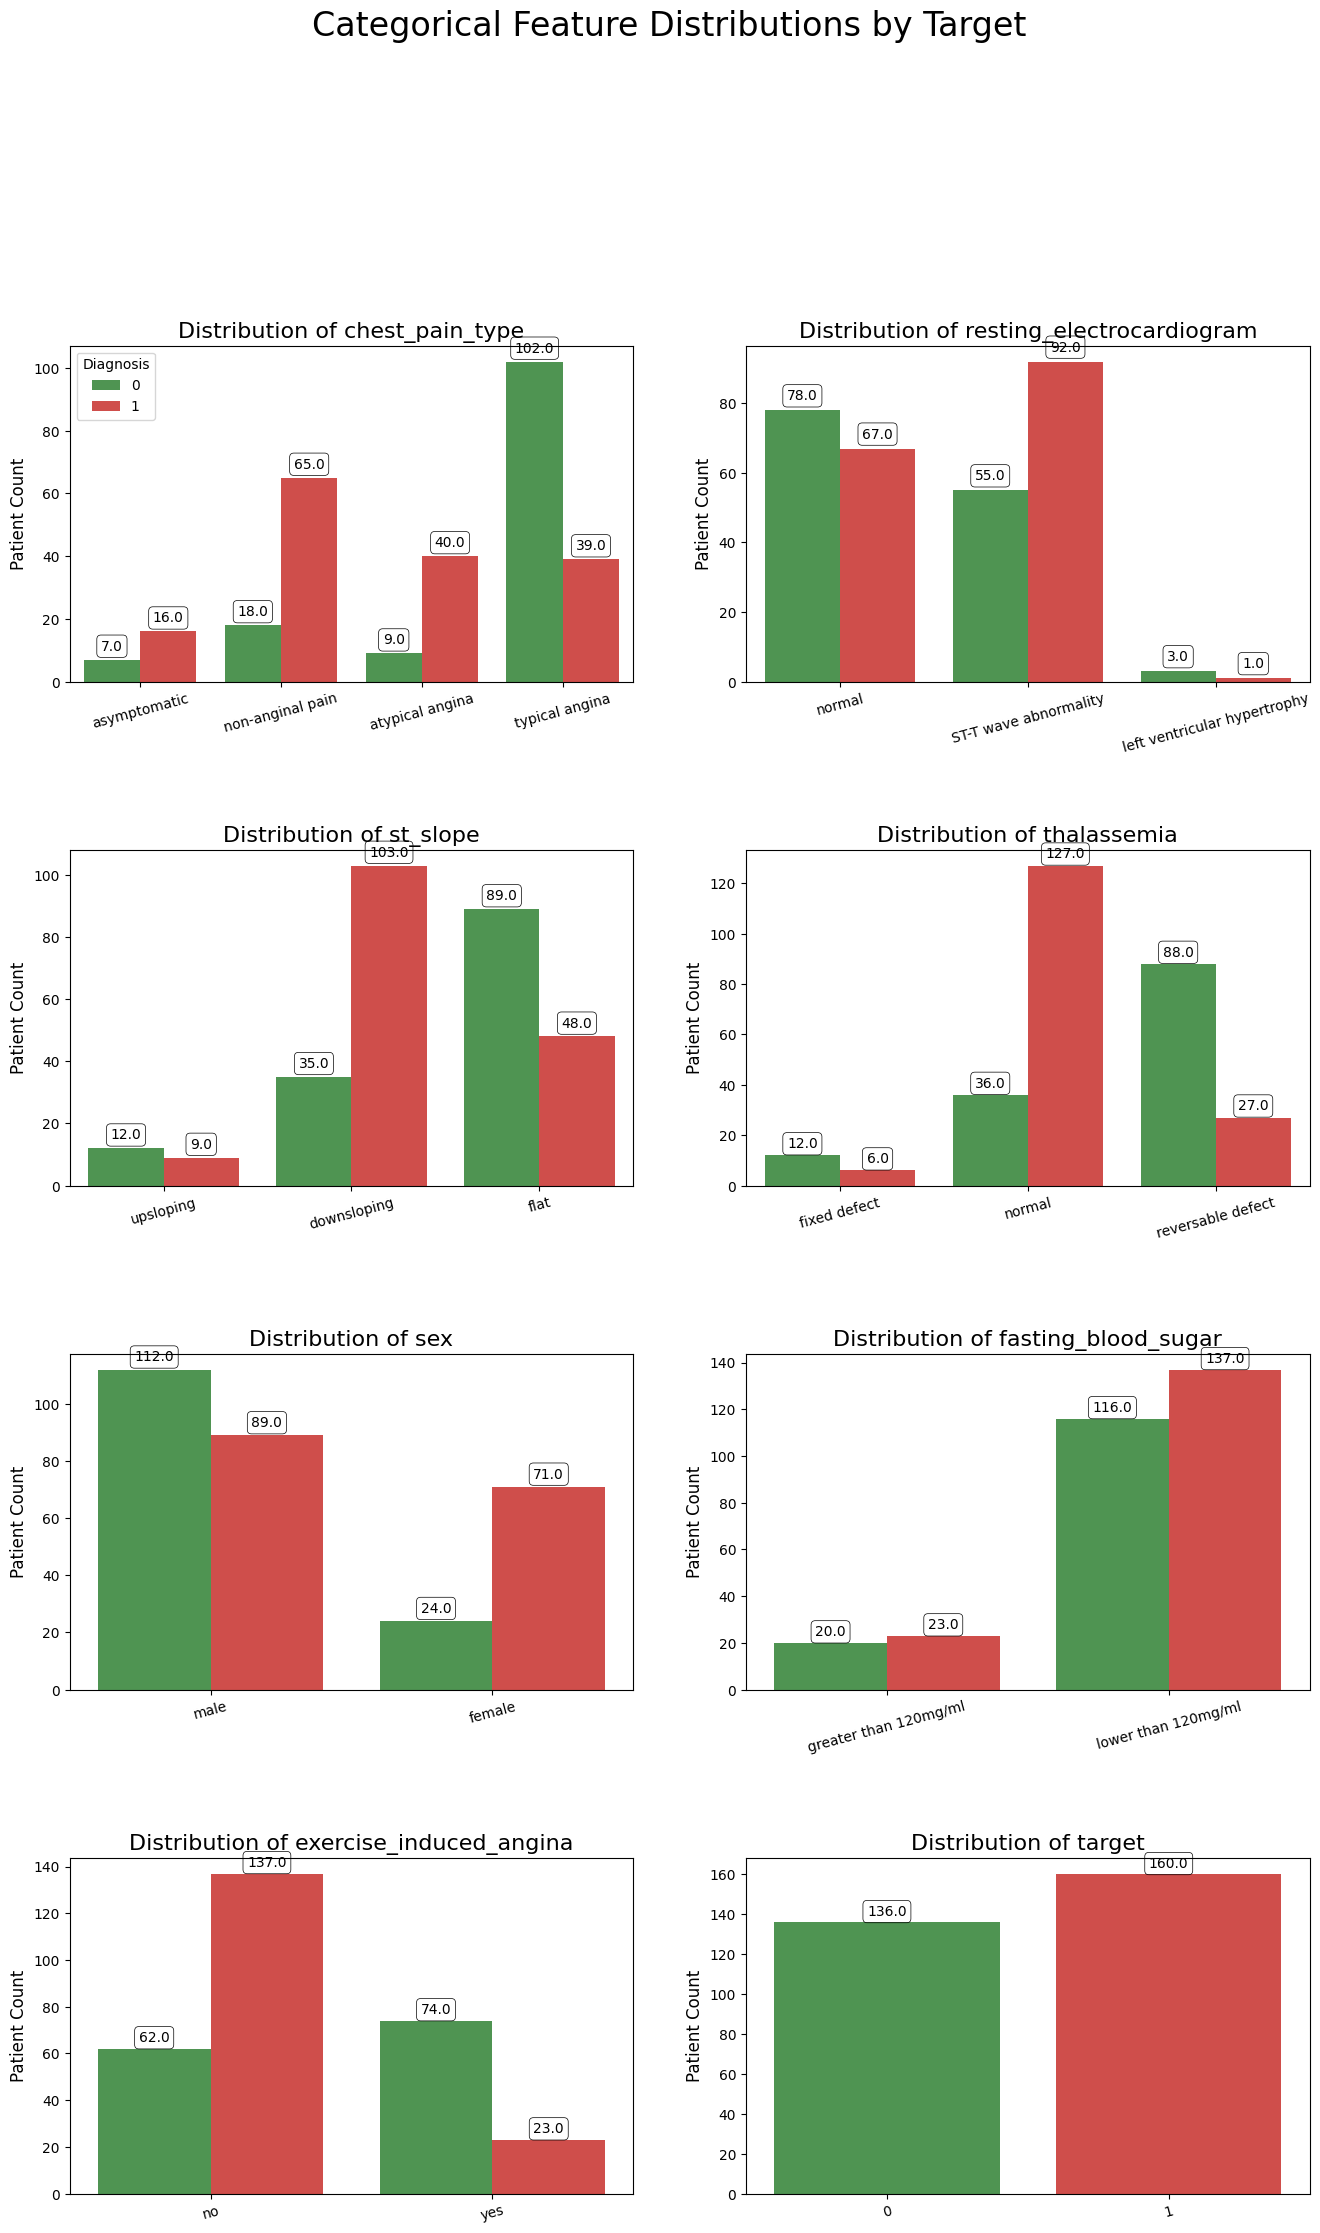

Generated 'categorical_distributions_annotated.png'


In [799]:
palette_colors = {0: '#43a047', 1: '#e53935'}
total = len(data)
ncol = 2
nrow = int(np.ceil(len(cat_feats) / ncol))
fig, axes = plt.subplots(nrow, ncol, figsize=(16, nrow * 6))
fig.subplots_adjust(hspace=0.5, wspace=0.2)

axes = axes.flatten()

print(f"Creating {len(cat_feats)} plots in a {nrow}x{ncol} grid...")

for i, col in enumerate(cat_feats):
  ax = axes[i]

  sns.countplot(x=col, data=data, palette=palette_colors, hue='target', ax=ax, legend=True)

  ax.set_title(f'Distribution of {col}', fontsize=16)
  ax.set_xlabel(None) # Remove x-label to avoid clutter
  ax.set_ylabel('Patient Count', fontsize=12)

  ax.tick_params(axis='x', rotation=15)

  for p in ax.patches:
    height = p.get_height()
    if height > 0:
      ax.text(p.get_x() + p.get_width() / 2., height + 3,
              f'{height}', ha="center", fontsize=10,
              bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

  if i == 0:
    ax.legend(title='Diagnosis')
  else:
    ax.get_legend().remove()


for i in range(len(cat_feats), len(axes)):
  axes[i].set_visible(False)

plt.suptitle('Categorical Feature Distributions by Target', fontsize=24, y=1.02)
plt.savefig('categorical_distributions_annotated.png')
plt.show()
print("Generated 'categorical_distributions_annotated.png'")

### Insights from Categorical Plots:
- Sex: More males are in the dataset, but a higher *percentage* of females have the disease.
- Chest Pain Type: This is a *very* strong predictor. 'Typical angina' (0) is highly associated with 'No Disease', while the other types (1, 2, 3) are more associated with 'Disease'.
- Exercise Induced Angina (exang): 'No' is strongly linked to 'Disease'. 'Yes' is strongly linked to 'No Disease'. This is a key predictor.
- ST Slope: 'Upsloping' (0) is linked to 'No Disease'. 'Downsloping' (2) is strongly linked to 'Disease'.
- Num Major Vessels (ca): '0' vessels is highly linked to 'Disease'. As the number of vessels increases, the likelihood of 'No Disease' increases.
- Thalassemia: 'Normal' (2) is linked to 'Disease'. 'Reversable Defect' (3) is strongly linked to 'No Disease'.

### **Correlation Heatmaps**

Correlation heatmap is a useful tool to graphyically represent how two features are related to eachother. Depending upon the data types of the features, we need to use the appropriate correlation coefficient calculation methods. Examples are pearson's correlation coefficient, point biserial correlation, cramers'V correlation and etc.

### Pearson's correlation

* The Pearson correlation coefficient ― is a measure of linear correlation between two sets of data. It is the ratio between the covariance of two variables and the product of their standard deviations; thus it is essentially a normalised measurement of the covariance, such that the result always has a value between −1 and 1.

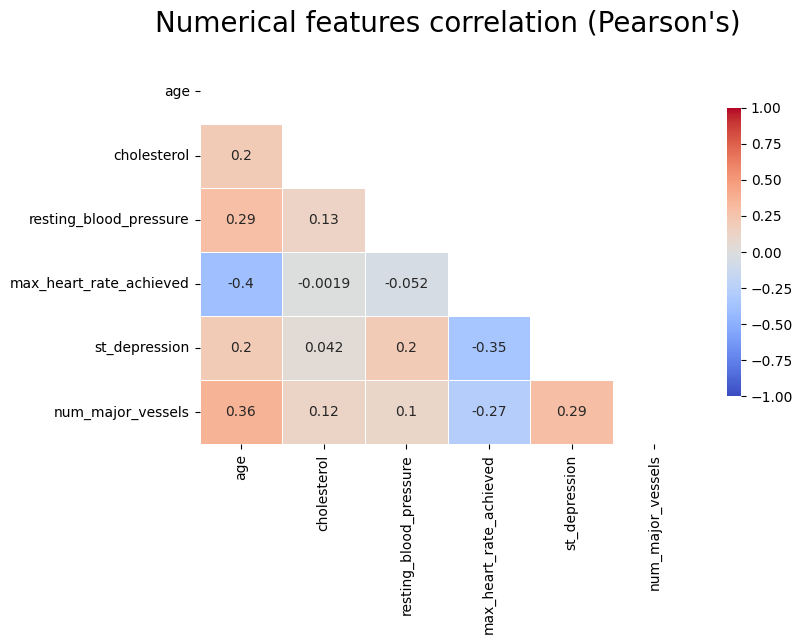

In [800]:
df_ = data[num_feats]
corr = df_.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(8, 5), facecolor=None)
cmap = sns.color_palette('coolwarm',as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1.0, center=0, annot=True,
            square=False, linewidths=.5, cbar_kws={"shrink": 0.75})
ax.set_title("Numerical features correlation (Pearson's)", fontsize=20, y= 1.05);

### Point biserial correlation
- A point-biserial correlation is used to measure the strength and direction of the association that exists between **one continuous variable and one dichotomous variable**. It is a special case of the Pearson’s product-moment correlation, which is applied when you have two continuous variables, whereas in this case one of the variables is measured on a dichotomous scale

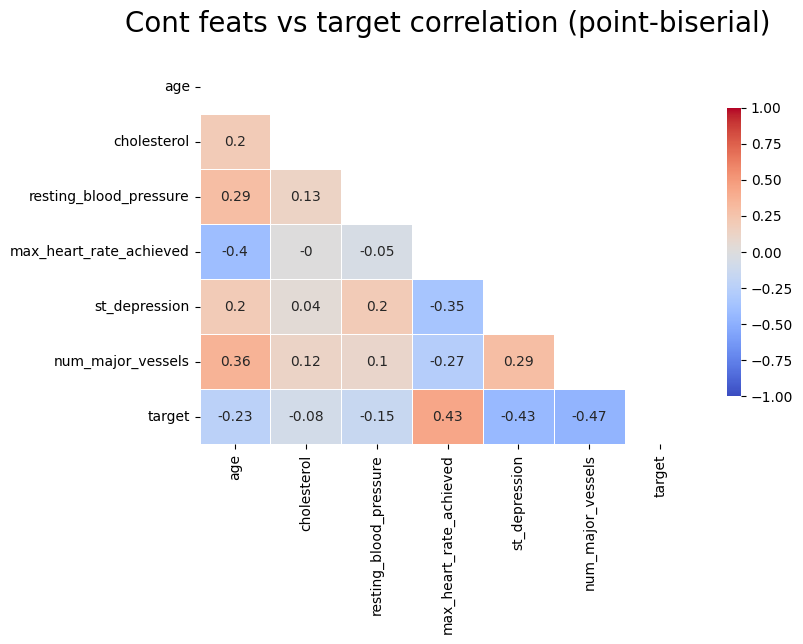

In [801]:
from scipy import stats

feats_ = ['age', 'cholesterol', 'resting_blood_pressure', 'max_heart_rate_achieved', 'st_depression', 'num_major_vessels', 'target']

def point_biserial(x, y):
    pb = stats.pointbiserialr(x, y)
    return pb[0]

rows= []
for x in feats_:
    col = []
    for y in feats_ :
        pbs =point_biserial(data[x], data[y])
        col.append(round(pbs,2))
    rows.append(col)

pbs_results = np.array(rows)
DF = pd.DataFrame(pbs_results, columns = data[feats_].columns, index =data[feats_].columns)

mask = np.triu(np.ones_like(DF, dtype=bool))
corr = DF.mask(mask)

f, ax = plt.subplots(figsize=(8, 5), facecolor=None)
cmap = sns.color_palette('coolwarm', as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1, center=0, annot=True,
            square=False, linewidths=.5, cbar_kws={"shrink": 0.75})
ax.set_title("Cont feats vs target correlation (point-biserial)", fontsize=20, y= 1.05);

### Cramer's V correlation

* In statistics, Cramér's V is a measure of association between **two nominal variables**, giving a value between 0 and +1 (inclusive). It is based on Pearson's chi-squared statistic.

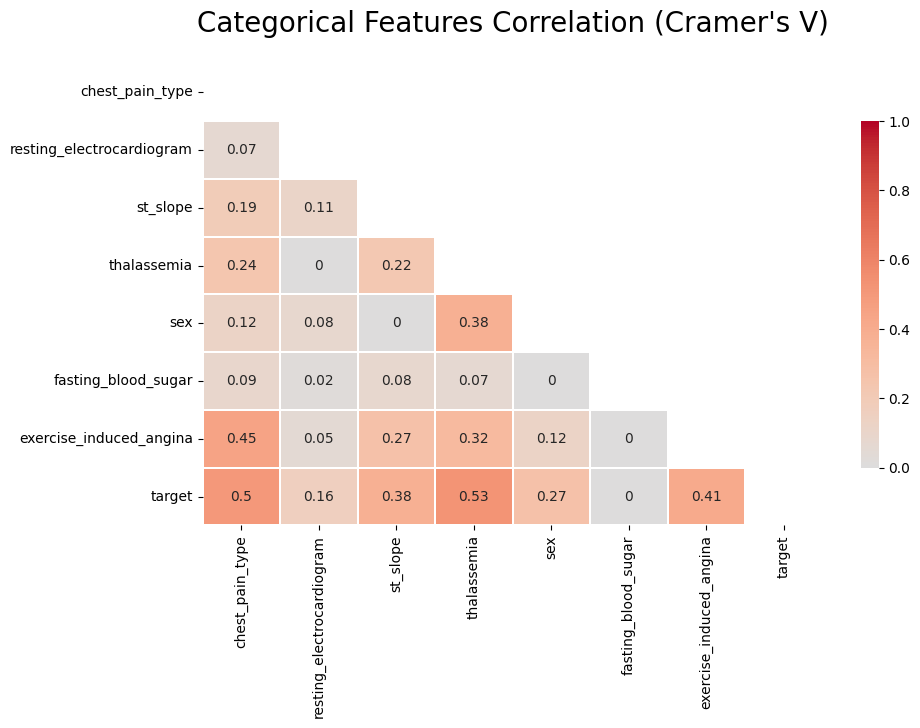

In [802]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

# calculate the correlation coefficients using the above function
data_ = data[cat_feats]
rows= []
for x in data_:
    col = []
    for y in data_ :
        cramers =cramers_v(data_[x], data_[y])
        col.append(round(cramers,2))
    rows.append(col)

cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = data_.columns, index = data_.columns)

# plot the heat map
mask = np.triu(np.ones_like(df, dtype=bool))
corr = df.mask(mask)
f, ax = plt.subplots(figsize=(10, 6), facecolor=None)
cmap = sns.color_palette('coolwarm', as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=0, center=0, annot=True,
            square=False, linewidths=.01, cbar_kws={"shrink": 0.75})
ax.set_title("Categorical Features Correlation (Cramer's V)", fontsize=20, y= 1.05);

In [803]:
# Extract correlation values with target only
pointbiserial_target_corr = DF['target'].drop('target')   # Drop self-correlation

# Convert to DataFrame for clarity
pb_df = pointbiserial_target_corr.reset_index()
pb_df.columns = ['Feature', 'Correlation']

# Keep only strong correlations
pb_df = pb_df[pb_df['Correlation'].abs() >= 0.2]

print("\n🔹 Important Numerical Features based on Point-Biserial:")
print(pb_df)


🔹 Important Numerical Features based on Point-Biserial:
                   Feature  Correlation
0                      age        -0.23
3  max_heart_rate_achieved         0.43
4            st_depression        -0.43
5        num_major_vessels        -0.47


In [804]:
cramers_target_corr = df['target'].drop('target')

cramers_df = cramers_target_corr.reset_index()
cramers_df.columns = ['Feature', 'Correlation']

cramers_df = cramers_df[cramers_df['Correlation'] >= 0.2]

print("\n🔸 Important Categorical Features based on Cramér’s V:")
print(cramers_df)


🔸 Important Categorical Features based on Cramér’s V:
                   Feature  Correlation
0          chest_pain_type         0.50
2                 st_slope         0.38
3              thalassemia         0.53
4                      sex         0.27
6  exercise_induced_angina         0.41


In [805]:
important_features = pb_df['Feature'].tolist() + cramers_df['Feature'].tolist()
print("\n Final Selected Important Features for Model Training:")
important_features



 Final Selected Important Features for Model Training:


['age',
 'max_heart_rate_achieved',
 'st_depression',
 'num_major_vessels',
 'chest_pain_type',
 'st_slope',
 'thalassemia',
 'sex',
 'exercise_induced_angina']

### **EDA Summary**:

* Data size: 303 rows and 14 columns (13 independent + one target variable) > later reduced to 296 after removing faulty data points!
* Data has no missing values
* Features (columns) data type:
    * Six features are numerical
    * The rest (seven features) are categorical variables
* Target variable is fairly balanced, 54% no-disease to 46% has-disease
* Correlations:
    * Correlation between features is weak at best
    * From the numerical features `num_major_vessels`, `max_heart_rate_achieved` and `st_depression` are reasonabily fairly correlated with the target variable at -0.47, 0.43 and -0.43 correlation coefficient respectively.
    * From the categorical features `chest_pain_type`, `thalassemia`, and `exercise_induced_angina` are better correlated with the target variable, `thalassemia` being the highest at 0.52.
    * Cholestrol (to my surprize, but what do I know?) has less correlation with heart desease.
  
            

## **Data Preprocessing**
Preprocess the data by separating features and target, handling outliers, encoding categorical features, scaling numerical features, and splitting the data into training and testing sets.

### Handling Outliers

In [806]:
#Function to count outliers using IQR method
def count_outliers(df, features):
    outlier_counts = {}
    for col in features:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        count = ((df[col] < lower) | (df[col] > upper)).sum()
        outlier_counts[col] = count
    return pd.Series(outlier_counts, name="Outlier Count")

# Count before handling
outliers_before = count_outliers(data, num_feats)
display(outliers_before)

# Apply IQR capping
for col in num_feats:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    data[col] = np.clip(data[col], lower, upper)

outliers_after = count_outliers(data, num_feats)
display(outliers_after)

comparison = pd.DataFrame({
    "Before": outliers_before,
    "After": outliers_after
})
print("\nOutlier Counts Before vs After:")
display(comparison)


,Outlier Count
age,0
cholesterol,5
resting_blood_pressure,9
max_heart_rate_achieved,1
st_depression,5
num_major_vessels,20


,Outlier Count
age,0
cholesterol,0
resting_blood_pressure,0
max_heart_rate_achieved,0
st_depression,0
num_major_vessels,0



Outlier Counts Before vs After:


,Before,After
age,0,0
cholesterol,5,0
resting_blood_pressure,9,0
max_heart_rate_achieved,1,0
st_depression,5,0
num_major_vessels,20,0


## Select Important Features
Here, we’re taking only the most significant predictors based on your correlation analysis.
This helps the model focus on high-impact variables and ignore noisy ones.

In [807]:
X = data[important_features]
y = data['target']

print("Selected features shape:", X.shape)
print("Target variable shape:", y.shape)
X.head()

Selected features shape: (296, 9)
Target variable shape: (296,)


,age,max_heart_rate_achieved,st_depression,num_major_vessels,chest_pain_type,st_slope,thalassemia,sex,exercise_induced_angina
0,63,150.0,2.3,0.0,asymptomatic,upsloping,fixed defect,male,no
1,37,187.0,3.5,0.0,non-anginal pain,upsloping,normal,male,no
2,41,172.0,1.4,0.0,atypical angina,downsloping,normal,female,no
3,56,178.0,0.8,0.0,atypical angina,downsloping,normal,male,no
4,57,163.0,0.6,0.0,typical angina,downsloping,normal,female,yes


### Handling Categorical Variables
Machine Learning models can only work with numbers.
`pd.get_dummies()` converts categorical columns into numeric form so the models can interpret them.

In [808]:
# Convert categorical to numerical
X = pd.get_dummies(X, drop_first=True)
X.head()

,age,max_heart_rate_achieved,st_depression,num_major_vessels,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,st_slope_flat,st_slope_upsloping,thalassemia_normal,thalassemia_reversable defect,sex_male,exercise_induced_angina_yes
0,63,150.0,2.3,0.0,False,False,False,False,True,False,False,True,False
1,37,187.0,3.5,0.0,False,True,False,False,True,True,False,True,False
2,41,172.0,1.4,0.0,True,False,False,False,False,True,False,False,False
3,56,178.0,0.8,0.0,True,False,False,False,False,True,False,True,False
4,57,163.0,0.6,0.0,False,False,True,False,False,True,False,False,True


### Spliting the Dataset
We divide the data into training (80%) and testing (20%) sets to evaluate model performance on unseen data.



In [809]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Data Split Completed:")
print(f"Training Samples: {X_train.shape[0]}")
print(f"Testing Samples: {X_test.shape[0]}")

Data Split Completed:
Training Samples: 236
Testing Samples: 60


### Feature Scaling
Scaling helps models like Logistic Regression perform better by ensuring all features contribute equally.
Tree-based models are less affected by scaling, but it doesn’t hurt to keep consistency.

In [810]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit only on training data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model Building and Evaluation

In [811]:
# Initializing multiple models for comparison
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Training and evaluating each model
for name, model in models.items():
    print("="*70)
    print(f" Training Model: {name}")
    print("="*70)

    # Use scaled data only for Logistic Regression
    if name == "Logistic Regression":
        model.fit(X_train_scaled, y_train)
        preds = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        preds = model.predict(X_test)

    # Evaluate
    acc = accuracy_score(y_test, preds)
    print(f"\n Accuracy of {name}: {acc:.3f}")
    print("\n Classification Report:")
    print(classification_report(y_test, preds))

 Training Model: Logistic Regression

 Accuracy of Logistic Regression: 0.850

 Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84        28
           1       0.87      0.84      0.86        32

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60

 Training Model: Decision Tree

 Accuracy of Decision Tree: 0.817

 Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.82      0.81        28
           1       0.84      0.81      0.83        32

    accuracy                           0.82        60
   macro avg       0.82      0.82      0.82        60
weighted avg       0.82      0.82      0.82        60

 Training Model: Random Forest

 Accuracy of Random Forest: 0.833

 Classification Report:
              precision    recall  f1-score   support

      

### Conclusion:
1. **Logistic Regression** gives the best accuracy on this dataset
2. Tree-based models (Decision Tree and Random Forest) perform slightly lower but are robust without requiring feature scaling.

### Saving the Model

In [812]:
import pickle

In [813]:
filename = 'heart_disease_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [814]:
loaded_model = pickle.load(open('heart_disease_model.sav', 'rb'))